>### **To-Do:**
>
>1. **Perform manual EDA**  
>    - Data cleaning:  
>         - Rename columns.  
>         - Replace semester codes with more understandable values.  
>         - Drop columns: 'Institución', 'Grado' (verify unique values first), 'IDCurso', 'código de la sesión', 'Nombre de la >sección', 'sección', 'Clase asociada', and schedule-related variables.  
>         - After removing non-value-adding variables, group data to prevent duplicates. Ensure each row represents a unique class.  
>    - EDA:
>         - Análisis temporal: matricula, cursos, clases.
>         -  
>2. **Perfom automated EDA**  
>3. **Compare results between manual and automated EDA**
>4. **Run two regressions and compare results: one with the clean dataset and one with the dirty dataset.**

---

> **Master's Degree in Data Sciences** | EAFIT University  
> **Course:** Fundamentals of Data Science    
> **Group:** Sara Martinez Rendon (smartiner4@eafit.edu.co) | Heider Zapata (hzapata1@eafit.edu.co) | Yeison Londoño (ylondon4@eafit.edu.co)  
> **Date:** 14/02/2026
---

# **Final Project**

---

## 1. Business Understanding and Problem Context

This section describes the business environment and the specific problem to be solved.

* **Business Description:** What is the organization or sector about?  
     The organization is **Universidad EAFIT**, specifically focusing on the **Academic Registry Office** (*Oficina de Registro Académico*) and the Vice-Rectory of Learning. The sector is higher education, dealing with the complex logistics of planning and scheduling undergraduate academic courses for upcoming terms.

* **Problem Context:** What specific pain point or need are we addressing?  
     Currently, the academic scheduling process is manual, reactive, and relies exclusively on pre-registration data, which has proven to be an insufficient predictor of actual demand. This leads to significant operational inefficiencies, such as the need to close unnecessary groups last minute, recalculate student fees, and strain infrastructure and customer service resources. The existing gap between the courses offered and those actually demanded creates administrative rework and affects the university's reputation.

* **Justification:** Why is it relevant to solve this problem now?  
     It is relevant to solve this problem now to transition from a manual process to a data-driven approach using historical data (2022-2026). By implementing a regression model, the university aims to reduce the mismatch between projected supply and actual student demand by at least **50%** compared to the last 8 semesters. This will optimize resource allocation, automate tedious tasks, and allow administrative staff to shift focus from operational repairs to strategic activities.

---

## 2. Data Selection and Origin

**Select a dataset of interest and indicate where it was obtained.**

* **Dataset:** The project utilizes two datasets in Excel format (`.xlsx`), each containing 9 tables.
* **Source:** Internal data from **Universidad EAFIT** corresponding to the academic programming and pre-enrollment records for the period **2022-2026**.
* **Key Variables:**
    * Subjects (Asignaturas)
    * Groups per subject
    * Schedules (Horarios)
    * Group capacity
    * Registered students per subject (Matrícula vs. Pre-matrícula)
* **Initial Data Assessment:**
    * **Missing Values:** Yes, the dataset contains missing values (NaN).
    * **Duplicates:** Yes, duplicate records have been identified.
    * **Inconsistencies:** No major inconsistencies observed so far.
    * **Correlations:** There are closely related variables, specifically between pre-enrollment figures and final enrollment.

---

## 3. Justification and Value Added

**Justification of the dataset with the value added it could give to the business.**

* **Limitations of the Current Process:**
    * Currently, decision-making is based **exclusively on pre-enrollment figures**, omitting key factors such as historical behavior and approval rates.
    * The process is **manual and reactive**, leading to operational inefficiencies and a high volume of last-minute adjustments (closing or opening groups) at the start of the semester.

* **Advantages of Analyzing this Dataset (Value Proposition):**
    * **Strategic Automation:** Analyzing this historical data (2022-2026) allows for the transition from a manual process to a **predictive analytical model**.
    * **Resource Optimization:** The model aims to minimize the "mismatch rate" between offered and demanded courses. This directly reduces the administrative burden of closing unnecessary groups or scrambling to open new ones.
    * **Operational Efficiency:** By automating the forecasting of necessary groups, administrative staff can shift focus from tedious operational tasks to high-impact strategic activities for the institution.
    * By implementing a regression model, the university aims to reduce the mismatch between projected supply and actual student demand by at least **50%** compared to the last 8 semesters.
---

## 4. Data Preparation (Data Wrangling)

In this phase, data loading, cleaning, and transformation are performed.

### 4.1. Loading Libraries and Data
*Importing pandas, numpy, matplotlib, seaborn, etc.*

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

In [37]:
# Read dataframes in the 'data' folder and store them in a dictionary with the filename as the key

# 1. Define current location (inside 'notebooks' folder)
current_folder = Path.cwd() 

# 2. Define project root (Move up one level)
# .parent takes us from '.../notebooks' to '.../Project_Root'
project_root = current_folder.parent

# 3. Build the path to the data
data_path = project_root / "data" / "raw"

# Verification
if not data_path.exists():
    print(f"⚠️ Path still not found: {data_path}")
    print(f"Searching from: {project_root}")
else:
    print(f"✅ Path found successfully: {data_path}")
    
    # 4. Loading loop
    data_frame = {}
    for archivo in data_path.glob("*.xlsx"):
        nombre = archivo.stem 
        data_frame[nombre] = pd.read_excel(archivo, skiprows=9)
        print(f"   -> Loaded: {nombre}")

✅ Path found successfully: c:\Users\ylondono\Maestria---Fundamentos-en-ciencia-de-datos\Proyecto_Final\data\raw
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397456
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397462
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397508
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397514
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397517
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397525
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397529
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397540
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397646


In [38]:
# Display the names of the dataframes that were successfully loaded
print(data_frame.keys())

dict_keys(['EA_PROGRAMACION_ACADEMIC_BASIC-18397456', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397462', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397508', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397514', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397517', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397525', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397529', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397540', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397646'])


In [39]:
# Display the dimensions (shape) of each dataframe
filas = []

for archivo, df in data_frame.items():
    print(f"File: {archivo}")
    print(df.shape)
    filas.append(df.shape[0])

print(f"Number of rows for each dataframe: {filas}")
print(f"Total number of rows for all dataframes combined: {sum(filas)}")

File: EA_PROGRAMACION_ACADEMIC_BASIC-18397456
(7726, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397462
(7969, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397508
(7155, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397514
(5663, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397517
(5541, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397525
(6802, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397529
(5188, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397540
(5345, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397646
(4862, 52)
Number of rows for each dataframe: [7726, 7969, 7155, 5663, 5541, 6802, 5188, 5345, 4862]
Total number of rows for all dataframes combined: 56251


In [40]:
# Concatenate all dataframes into a single one
prog_acad = pd.concat(data_frame.values(), ignore_index=True)

# Validate that the size matches the sum from the previous cell
print(prog_acad.shape)

(56251, 52)


In [41]:
# Download a copy of the concatenated dataset
data_path = project_root / "data" / "processed" / "01_data_total.xlsx"
prog_acad.to_excel(data_path, index=False)

### 4.2. Initial Exploration
*Reviewing structure, data types (`.info()`), and first rows (`.head()`).*

In [42]:
# Explore the academic programming dataframe for the last 9 semesters

pd.set_option("display.max_columns", None)
prog_acad.head(5)

,Institución,Grado,Ciclo,Código Catalogo,ID Curso,Nombre Catálogo,Código de la sesión,Sección,Nombre de la sesión,Número de Clase,Clase Asociada,Ubicación,Calendario Festivos,Modo Enseñanza,Modo Enseñanza Descr,Fec_Ini_Real_Clase,Fec_Fin_Real_Clase,Fecha_Ini_Mod_Reunión,Fecha_Fin_Mod_Reunión,Hora Inicio,Hora Fin,Días,Aula Asignada,Capacidad,Tipo Instalación,Código del Departamento,Docentes,Email Docente,Nom Estado Clase,Horas por semana,Metodología,Metodología descripción,Total Hrs Curso,Tipo de curso,Componente,Idioma,Rol Profesor,Acceso,Tipo Asignación,Tipo Clase,Componente Calificado,# Cupos disponibles,Tamaño Sección p/Def,Capcd Inscr,Tot Inscr,Estado Clase,Campus,Horas Programadas,Org Acad,Grupo Académico,Estado Inscripción,Prior
0,EAFIT - Universidad EAFIT,PREG,2661,CS0092,109867,Fotografía,ORD,5,Sesión Curso Ordinaria,7600,1,POBLADO,PREG,P,Presencial,2026-01-21,2026-05-13,2026-01-19,2026-05-16,06:00:00,09:00:00,Miercoles,NaN,0,NaN,CS,NaN,NaN,Detener Inscripción,DEFECTO,R,Magistral Reforma,48,ABIERTO,Clase,ESPANOL,Profesor Titular,Aprobar,Docencia normal,Sección Inscripción,Clase,20,20,20,0,S,MEDEL,48.0,SP,Escuela de Artes y Humanidades,Correcto,1
1,EAFIT - Universidad EAFIT,PREG,2661,CS0092,109867,Fotografía,ORD,6,Sesión Curso Ordinaria,7602,1,POBLADO,PREG,P,Presencial,2026-01-21,2026-05-13,2026-01-19,2026-05-16,15:00:00,18:00:00,Miercoles,Poblado Bloque 29 Aula 205,25,Aula normal,CS,1000137468-CC-1128275920-DAVID CORREA FRANCO-P...,dcorreaf@eafit.edu.co,Activo,DEFECTO,R,Magistral Reforma,48,ABIERTO,Clase,ESPANOL,Profesor Titular,Aprobar,Docencia normal,Sección Inscripción,Clase,0,20,9,9,A,MEDEL,48.0,SP,Escuela de Artes y Humanidades,Correcto,2
2,EAFIT - Universidad EAFIT,PREG,2661,CS0240,109937,Teo. de Func. y Efectos Comun.,ORD,2,Sesión Curso Ordinaria,1857,1,POBLADO,PREG,P,Presencial,2026-01-19,2026-05-16,NaT,NaT,NaN,NaN,NaN,NaN,0,NaN,CS,NaN,NaN,Sección Cancelada,DEFECTO,R,Magistral Reforma,48,ABIERTO,Clase,ESPANOL,NaN,NaN,NaN,Sección Inscripción,Clase,25,30,25,0,X,MEDEL,0.0,SP,Escuela de Artes y Humanidades,NaN,1
3,EAFIT - Universidad EAFIT,PREG,2661,LE0001,134275,Prueba de Lectura 1,ORD,1,Sesión Curso Ordinaria,7543,1,POBLADO,PREG,P,Presencial,2026-02-14,2026-02-14,2026-02-14,2026-02-14,07:00:00,09:00:00,Sábado,Poblado Bloque 18 Computo 315,30,Sala De Computo,LE,NaN,NaN,Detener Inscripción,DEFECTO,R,Magistral Reforma,2,ABIERTO,Clase,ESPANOL,NaN,NaN,NaN,Sección Inscripción,Clase,27,30,27,0,S,MEDEL,2.0,LE,Escuela de Artes y Humanidades,Correcto,5
4,EAFIT - Universidad EAFIT,PREG,2661,LE0001,134275,Prueba de Lectura 1,ORD,2,Sesión Curso Ordinaria,7544,1,POBLADO,PREG,P,Presencial,2026-02-14,2026-02-14,2026-02-14,2026-02-14,07:00:00,09:00:00,Sábado,Poblado Bloque 20 Computo 413,50,Sala De Computo- Lab Procesami,LE,NaN,NaN,Activo,DEFECTO,R,Magistral Reforma,2,ABIERTO,Clase,ESPANOL,NaN,NaN,NaN,Sección Inscripción,Clase,0,30,40,40,A,MEDEL,2.0,LE,Escuela de Artes y Humanidades,Correcto,1


In [43]:
prog_acad.columns

Index(['Institución', 'Grado', 'Ciclo', 'Código Catalogo', 'ID Curso',
       'Nombre Catálogo', 'Código de la sesión', 'Sección',
       'Nombre de la sesión', 'Número de Clase', 'Clase Asociada', 'Ubicación',
       'Calendario Festivos', 'Modo Enseñanza', 'Modo Enseñanza Descr',
       'Fec_Ini_Real_Clase', 'Fec_Fin_Real_Clase', 'Fecha_Ini_Mod_Reunión',
       'Fecha_Fin_Mod_Reunión', 'Hora Inicio', 'Hora Fin', 'Días',
       'Aula Asignada', 'Capacidad', 'Tipo Instalación',
       'Código del Departamento', 'Docentes', 'Email Docente',
       'Nom Estado Clase', 'Horas por semana', 'Metodología',
       'Metodología descripción', 'Total Hrs Curso', 'Tipo de curso',
       'Componente', 'Idioma', 'Rol Profesor', 'Acceso', 'Tipo Asignación',
       'Tipo Clase', 'Componente Calificado', '# Cupos disponibles',
       'Tamaño Sección p/Def', 'Capcd Inscr', 'Tot Inscr', 'Estado Clase',
       'Campus', 'Horas Programadas', 'Org Acad', 'Grupo Académico',
       'Estado Inscripción', 'Pri

In [44]:
prog_acad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56251 entries, 0 to 56250
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Institución              56251 non-null  object        
 1   Grado                    56251 non-null  object        
 2   Ciclo                    56251 non-null  int64         
 3   Código Catalogo          56251 non-null  object        
 4   ID Curso                 56251 non-null  int64         
 5   Nombre Catálogo          56251 non-null  object        
 6   Código de la sesión      56251 non-null  object        
 7   Sección                  56251 non-null  object        
 8   Nombre de la sesión      56251 non-null  object        
 9   Número de Clase          56251 non-null  int64         
 10  Clase Asociada           56251 non-null  int64         
 11  Ubicación                56251 non-null  object        
 12  Calendario Festivos      56251 n

### 4.3. Data Cleaning

In [132]:
 # Create a copy of the original dataframe to make changes
programacion = prog_acad.copy()

#### 4.3.1.

**Data Filtering:** Target Subset Analysis  

Before proceeding with the analysis, we need to focus on the specific scope of the project: In-person classes at the Poblado campus. We will first estimate the proportion of the data that meets these criteria to ensure that filtering does not result in a significant loss of information.

In [133]:
# Rename columns to make them easier to understand
programacion = programacion.rename(columns={ "Ciclo" : "Semestre",
                                             "Código Catalogo" : "Código Materia",
                                             "Nombre Catálogo" : "Nombre Materia",
                                             "Fecha_Ini_Mod_Reunión" : "Fecha Inicio",
                                             "Fecha_Fin_Mod_Reunión" : "Fecha Fin",
                                             "Tot Inscr" : "Total Inscritos",
                                             "Grupo Académico" : "Escuela"
                                            })
programacion.columns

Index(['Institución', 'Grado', 'Semestre', 'Código Materia', 'ID Curso',
       'Nombre Materia', 'Código de la sesión', 'Sección',
       'Nombre de la sesión', 'Número de Clase', 'Clase Asociada', 'Ubicación',
       'Calendario Festivos', 'Modo Enseñanza', 'Modo Enseñanza Descr',
       'Fec_Ini_Real_Clase', 'Fec_Fin_Real_Clase', 'Fecha Inicio', 'Fecha Fin',
       'Hora Inicio', 'Hora Fin', 'Días', 'Aula Asignada', 'Capacidad',
       'Tipo Instalación', 'Código del Departamento', 'Docentes',
       'Email Docente', 'Nom Estado Clase', 'Horas por semana', 'Metodología',
       'Metodología descripción', 'Total Hrs Curso', 'Tipo de curso',
       'Componente', 'Idioma', 'Rol Profesor', 'Acceso', 'Tipo Asignación',
       'Tipo Clase', 'Componente Calificado', '# Cupos disponibles',
       'Tamaño Sección p/Def', 'Capcd Inscr', 'Total Inscritos',
       'Estado Clase', 'Campus', 'Horas Programadas', 'Org Acad', 'Escuela',
       'Estado Inscripción', 'Prior'],
      dtype='object')

In [134]:
# Replace the codes in the 'Semestre' column with more descriptive values to facilitate subsequent analysis
mapa_semestres = {
                "2261": "2022-1",
                "2266": "2022-2",
                "2361": "2023-1",
                "2366": "2023-2",
                "2461": "2024-1",
                "2466": "2024-2",
                "2561": "2025-1",
                "2566": "2025-2",
                "2661": "2026-1"
                }       

programacion["Semestre"] = programacion["Semestre"].astype(str).replace(mapa_semestres)
programacion["Semestre"].value_counts().sort_index()

Semestre
2022-1    4862
2022-2    5345
2023-1    5188
2023-2    6802
2024-1    5541
2024-2    5663
2025-1    7155
2025-2    7969
2026-1    7726
Name: count, dtype: int64

Now that we have standardized the column names and academic periods, we will verify the size of our target subset:

In [135]:
# 1. Define the composite condition
# "Ubicación" == POBLADO AND "Modo Enseñanza" == P [In-person]
condition = (programacion['Ubicación'] == 'POBLADO') & (programacion['Modo Enseñanza'] == 'P')

# 2. Calculate the total proportion
# The mean of the boolean series provides the global fulfillment percentage
total_proportion = condition.mean()

# 3. Calculate the proportion by 'Semestre'
# Group the boolean series by the original dataframe's 'Semestre' column and calculate the mean
proportion_by_semester = condition.groupby(programacion['Semestre']).mean()

# --- Print results ---
print(f"Proportion of in-person observations in Poblado - Total (Global): {total_proportion:.2%}")

print("\nProportion of in-person observations in Poblado by Semester:")
# Display the results formatted as percentages
print(proportion_by_semester.apply(lambda x: f"{x:.2%}"))

Proportion of in-person observations in Poblado - Total (Global): 97.69%

Proportion of in-person observations in Poblado by Semester:
Semestre
2022-1    94.01%
2022-2    96.35%
2023-1    96.14%
2023-2    99.06%
2024-1    98.54%
2024-2    98.91%
2025-1    97.75%
2025-2    98.23%
2026-1    98.68%
dtype: object


**We filter the subset of interest (df)**:

In [136]:
# 1. Check current dataset dimensions
print(f"Original dataset size: {programacion.shape}")

# 2. Apply filtering for the subset of interest
# Criteria: Location = 'POBLADO' AND Teaching Mode = 'P' (In-person)
df = programacion[
    (programacion['Ubicación'] == 'POBLADO') & 
    (programacion['Modo Enseñanza'] == 'P')
].copy() # By using .copy(), we explicitly tell Python that we want to create a new object in memory.

# 3. Verify the resulting subset size
print(f"Filtered subset size (Poblado/In-person): {df.shape}")

# 4. Calculate the percentage of data retained
retention_rate = (len(df) / len(programacion)) * 100
print(f"Data retention rate: {retention_rate:.2f}%")

Original dataset size: (56251, 52)
Filtered subset size (Poblado/In-person): (54954, 52)
Data retention rate: 97.69%


Define which variable we will use as the course ID (each observation will ultimately be one course per semester)

In [137]:
# Group by 'Código Materia' and count how many unique 'ID Curso' values are associated with each
# This ensures that one Subject Code does not map to multiple different Course IDs
subject_id_check = df.groupby('Código Materia')['ID Curso'].nunique()

# Filter to find any instances where a 'Código Materia' has more than 1 'ID Curso'
inconsistencies = subject_id_check[subject_id_check > 1]

# Display the results
if inconsistencies.empty:
    print("Verification Successful: Each 'Código Materia' maps to exactly one 'ID Curso'.")
    print("We can proceed with dropping 'ID Curso' as it provides no additional unique info.")
else:
    print(f"Alert: {len(inconsistencies)} subject(s) found with multiple Course IDs:")
    print(inconsistencies)

Verification Successful: Each 'Código Materia' maps to exactly one 'ID Curso'.
We can proceed with dropping 'ID Curso' as it provides no additional unique info.


We proceed to eliminate extra IDs and other variables that do not add value to the analytical exercise

In [138]:
# Remove columns that are not considered relevant for the analysis
# (Either because they have a fixed or default value that adds no insight, or because—as with schedules—they
# result in duplicates that offer no added value. This specific analysis of scheduling will be conducted in a subsequent phase)

df = df.drop(columns=["Institución", "Grado", "ID Curso", "Código de la sesión", "Nombre de la sesión", "Ubicación", "Calendario Festivos", "Modo Enseñanza", "Modo Enseñanza Descr",
                                          "Fec_Ini_Real_Clase", "Fec_Fin_Real_Clase", "Aula Asignada", "Capacidad", "Tipo Instalación", "Idioma", "Código del Departamento", "Docentes", "Email Docente", "Horas por semana",
                                          "Metodología", "Metodología descripción", "Total Hrs Curso", "Horas Programadas", "Tipo de curso" , "Rol Profesor", "Acceso", "Tipo Asignación", "Componente Calificado","Campus", "Estado Clase", "Org Acad", "Estado Inscripción", 
                                          "Prior"], axis=1)


# Download a copy of the concatenated dataset
#data_path = project_root / "data" / "processed" / "02_data.xlsx"
#df.to_excel(data_path, index=False)

In [139]:
print(df.columns)
print(df.shape)
df.head()

Index(['Semestre', 'Código Materia', 'Nombre Materia', 'Sección',
       'Número de Clase', 'Clase Asociada', 'Fecha Inicio', 'Fecha Fin',
       'Hora Inicio', 'Hora Fin', 'Días', 'Nom Estado Clase', 'Componente',
       'Tipo Clase', '# Cupos disponibles', 'Tamaño Sección p/Def',
       'Capcd Inscr', 'Total Inscritos', 'Escuela'],
      dtype='object')
(54954, 19)


,Semestre,Código Materia,Nombre Materia,Sección,Número de Clase,Clase Asociada,Fecha Inicio,Fecha Fin,Hora Inicio,Hora Fin,Días,Nom Estado Clase,Componente,Tipo Clase,# Cupos disponibles,Tamaño Sección p/Def,Capcd Inscr,Total Inscritos,Escuela
0,2026-1,CS0092,Fotografía,5,7600,1,2026-01-19,2026-05-16,06:00:00,09:00:00,Miercoles,Detener Inscripción,Clase,Sección Inscripción,20,20,20,0,Escuela de Artes y Humanidades
1,2026-1,CS0092,Fotografía,6,7602,1,2026-01-19,2026-05-16,15:00:00,18:00:00,Miercoles,Activo,Clase,Sección Inscripción,0,20,9,9,Escuela de Artes y Humanidades
2,2026-1,CS0240,Teo. de Func. y Efectos Comun.,2,1857,1,NaT,NaT,NaN,NaN,NaN,Sección Cancelada,Clase,Sección Inscripción,25,30,25,0,Escuela de Artes y Humanidades
3,2026-1,LE0001,Prueba de Lectura 1,1,7543,1,2026-02-14,2026-02-14,07:00:00,09:00:00,Sábado,Detener Inscripción,Clase,Sección Inscripción,27,30,27,0,Escuela de Artes y Humanidades
4,2026-1,LE0001,Prueba de Lectura 1,2,7544,1,2026-02-14,2026-02-14,07:00:00,09:00:00,Sábado,Activo,Clase,Sección Inscripción,0,30,40,40,Escuela de Artes y Humanidades


#### **4.3.2. Dataset Restructuring**
To conduct a robust analysis, we will restructure the database so that each observation represents a unique Subject-Semester pair. This change in granularity is essential to create and merge, from the original data, the following datasets:

**a. Total Enrollment:** Number of students enrolled per subject and semester.

**b. Total Sections Opened:** Number of initial groups created per subject and semester.

**c. Total Effective Sections:** Number of active groups (excluding those eventually canceled) per subject and semester.

**d. Pre-enrollment Data:** Total pre-registered students per subject and semester (integrated from external data sources).

**e. Failure Rates:** Total number of students who failed the subject per semester (integrated from external data sources).

**f. First-Semester Indicator:** Categorizing subjects that belong to the first level of the undergraduate program (integrated from external data sources).

##### **df_1: Total enrollment**

**Total Enrollment:** Number of students enrolled per subject and semester.

The first step in calculating the enrollment per subject and semester is to filter out records where the status is 'Cancelled' or 'Provisional'.

Class Status Definitions:
<ul>
    <li>Activo (Active): Active classes in the semester.</li>
    <li>Detener Inscripción (Stop Enrollment): Classes that were active, and at some point enrollment was stopped so that no more students could enroll.</li>
    <li>Sección Cancelada (Cancelled Section): Classes that were determined not to be used. These always have zero enrolled students.</li>
    <li>Sección Provisional (Provisional Section): A temporary status that was only used once, in a single class in the 2022-1 semester.</li>
</ul>

In [140]:
# Check the "Nom Estado Clase" column to see which statuses exist. 
# The intent is to remove 'Sección Cancelada' and 'Sección Provisional', 
# as these statuses are assigned to classes that will not be held during the semester.
df["Nom Estado Clase"].unique()

array(['Detener Inscripción', 'Activo', 'Sección Cancelada',
       'Sección Provisional'], dtype=object)

We observed that 'Sección Provisional' only appeared in two instances within a single semester. Since this is not statistically significant or relevant to the overall analysis, these records will be removed to maintain data quality.

In [141]:
# It is observed that 'Sección Provisional' was a status used in only two classes during a single semester.
# It is not relevant for the analysis, so it will be removed.
df[df["Nom Estado Clase"] == "Sección Provisional"]

,Semestre,Código Materia,Nombre Materia,Sección,Número de Clase,Clase Asociada,Fecha Inicio,Fecha Fin,Hora Inicio,Hora Fin,Días,Nom Estado Clase,Componente,Tipo Clase,# Cupos disponibles,Tamaño Sección p/Def,Capcd Inscr,Total Inscritos,Escuela
52140,2022-1,HL0229,Curso Proyecto - 1 Crédito,3,5946,3,2022-03-19,2022-03-19,12:00:00,14:00:00,Sábado,Sección Provisional,Clase,Sección Inscripción,9,10,10,1,Escuela de Artes y Humanidades
52141,2022-1,HL0229,Curso Proyecto - 1 Crédito,3,5946,3,2022-05-28,2022-05-28,18:00:00,20:00:00,Sábado,Sección Provisional,Clase,Sección Inscripción,9,10,10,1,Escuela de Artes y Humanidades


To ensure the analysis only includes relevant academic activity, the dataset is filtered to retain only active classes or those where enrollment was specifically halted. Cancelled and provisional sections are excluded.

In [142]:
# 1. Store the initial number of observations
initial_count = len(df)

# 2. Apply the filter: keep only 'Activo' and 'Detener Inscripción'
df = df[df["Nom Estado Clase"].isin(["Activo", "Detener Inscripción"])].copy() #Using .copy() even when renaming is a "technical defense." It ensures that the original object is released from memory correctly and that your new subset does not inherit memory reference issues.

# 3. Calculate filtering metrics
final_count = len(df)
removed_count = initial_count - final_count
proportion_removed = (removed_count / initial_count) if initial_count > 0 else 0

# --- Print results ---
print(f"Unique values in 'Nom Estado Clase' after filtering: {df['Nom Estado Clase'].unique()}")
print(f"Dataset shape after filtering: {df.shape}")
print(f"Observations removed: {removed_count}")
print(f"Proportion of data removed: {proportion_removed:.2%}")

Unique values in 'Nom Estado Clase' after filtering: ['Detener Inscripción' 'Activo']
Dataset shape after filtering: (49637, 19)
Observations removed: 5317
Proportion of data removed: 9.68%


**Filtering `Componente == 'Clase'` for preventing Overestimation**

Once we have isolated the active classes, we proceed to filter the dataset to include only records where `Componente == 'Clase'` (Lecture). This ensures that when we aggregate the data by subject and semester, we avoid overestimating the total enrollment. Since laboratories and lectures often share the same student list, failing to remove the lab component would double the enrollment count for any subject requiring a practical session

In [143]:
print(f"Tipos de clases (Componente): {df["Componente"].unique()}")

# Store the count before filtering by component type
initial_comp_count = len(df)

# Filter to keep only the primary 'Clase' component
# This avoids double-counting students in subjects that also have Labs or Practices
df = df[df["Componente"] == "Clase"].copy()

# Calculate filtering metrics
final_comp_count = len(df)
removed_comp = initial_comp_count - final_comp_count
retention_rate = (final_comp_count / initial_comp_count) if initial_comp_count > 0 else 0

# --- Print results ---
print(f"Unique values in 'Componente' after filtering: {df['Componente'].unique()}")
print(f"Observations removed (Labs/other components): {removed_comp}")
print(f"Dataset shape after component filtering: {df.shape}")
print(f"Data retention rate for this step: {retention_rate:.2%}")

Tipos de clases (Componente): ['Clase' 'Laboratorio' 'Prácticas' 'Conferencia' 'Salidas de campo'
 'Inducción' 'Deportes' 'Clase-Unión']
Unique values in 'Componente' after filtering: ['Clase']
Observations removed (Labs/other components): 5103
Dataset shape after component filtering: (44534, 19)
Data retention rate for this step: 89.72%


**Aggregating Enrollment and Capacity per Subject**

Having removed canceled sections and non-lecture components (such as laboratories) that could lead to duplicate enrollment counts, we now isolate the essential variables required for subject-level grouping:

- Semester

- Subject Code

- Total Enrollment

- Available Capacity

This step focuses the dataset on the core predictors for our regression model. By aggregating the total number of enrolled students and available spots at the subject level, we create a refined historical record spanning the 2022–2026 period. This consolidated structure allows us to accurately track student demand patterns, providing a critical foundation for predicting the required number of groups for the upcoming 2026-1 academic cycle




---

Note: Since the combinations of Subject Code and School, and Subject Code and Subject Name, are not unique, we will exclude them from the analysis. This may be due to changes in the names of Schools and Subjects over time:

In [ ]:
# Verification: Unique mapping between 'Código Materia' and 'Nombre Materia'
# This ensures that each subject code consistently maps to the same name throughout the dataset.

# 1. Check if any Subject Code is associated with multiple names
code_to_name_check = df.groupby('Código Materia')['Nombre Materia'].nunique()
code_mismatches = code_to_name_check[code_to_name_check > 1]

# 2. Check if any Subject Name is associated with multiple codes
name_to_code_check = df.groupby('Nombre Materia')['Código Materia'].nunique()
name_mismatches = name_to_code_check[name_to_code_check > 1]

# --- Print Results ---
if code_mismatches.empty and name_mismatches.empty:
    print("Verification Successful: There is a unique 1-to-1 mapping between 'Código Materia' and 'Nombre Materia'.")
else:
    if not code_mismatches.empty:
        print(f"Alert: Found {len(code_mismatches)} code(s) associated with multiple names:")
        print(code_mismatches)
    
    if not name_mismatches.empty:
        print(f"Alert: Found {len(name_mismatches)} name(s) associated with multiple codes:")
        print(name_mismatches)

Alert: Found 36 code(s) associated with multiple names:
Código Materia
BI0499    2
BU0231    2
CM0108    2
CS0280    2
DE0156    2
DE0520    2
DE0887    2
DE0888    2
DE0889    2
DR1003    2
DR3013    2
DR5001    2
EC0266    2
HL0551    2
IA0502    2
ID0910    2
ID0911    2
ID0912    2
ID0913    2
MU0396    2
MU0398    2
MU0681    2
MU0934    2
MU0936    2
MU0938    2
MU2381    2
NI0269    2
NM1005    2
NM2003    2
PR0240    2
PT0267    2
PT0291    2
PT0311    2
SI2001    2
ST0245    2
ST0247    2
Name: Nombre Materia, dtype: int64
Alert: Found 244 name(s) associated with multiple codes:
Nombre Materia
Acciones Predictivas             2
Acciones Preventivas             2
Acción Colectiva                 2
Administración Pública           3
Administración de Operaciones    3
                                ..
Énfasis III                      2
Énfasis IV                       2
Ética                            2
Ética Pública                    2
Óptica                           3
Name:

In [150]:
# Group by 'Código Materia' and count the number of unique 'Escuela' values associated with each
# This ensures that a single subject doesn't appear under different schools due to data entry errors
school_consistency_check = df.groupby('Código Materia')['Escuela'].nunique()

# Identify subjects mapped to more than one school
school_mismatches = school_consistency_check[school_consistency_check > 1]

# --- Print results ---
if school_mismatches.empty:
    print("Verification Successful: Each 'Código Materia' is associated with exactly one 'Escuela'.")
    print("The academic hierarchy is consistent across the dataset.")
else:
    print(f"Warning: {len(school_mismatches)} subject(s) are mapped to multiple schools:")
    print(school_mismatches)

Código Materia
BI0045    2
BI0230    2
BI0231    2
BI0232    2
BI0233    2
         ..
GP0676    2
GP0677    2
HL1419    2
PR0311    2
ST0291    2
Name: Escuela, Length: 236, dtype: int64


---

We proceed with grouping:

In [152]:
# 1. Select only the necessary columns for the subject-level analysis
columns_to_keep = ['Semestre', 'Código Materia', 'Total Inscritos', '# Cupos disponibles']
df_subset = df[columns_to_keep]

# 2. Group by Semester and Subject identifiers
# We sum the enrollment and available spots to get the total subject volume
df_1 = df_subset.groupby(['Semestre', 'Código Materia']).agg({
    'Total Inscritos': 'sum',
    '# Cupos disponibles': 'sum'
}).reset_index()

# 3. Rename columns for clarity in the final dataset
df_1 = df_1.rename(columns={
    'Total Inscritos': 'Total_Inscritos_Subject',
    '# Cupos disponibles': 'Total_Spots_Available'
})

# --- Print verification ---
print(f"Restructured dataset (df_1) shape: {df_1.shape}")
print(f"Periods covered: {df_1['Semestre'].nunique()}")
df_1.head()

Restructured dataset (df_1) shape: (13781, 4)
Periods covered: 9


,Semestre,Código Materia,Total_Inscritos_Subject,Total_Spots_Available
0,2022-1,BI0045,28,0
1,2022-1,BI0230,96,12
2,2022-1,BI0231,18,4
3,2022-1,BI0232,28,52
4,2022-1,BI0233,0,20


> **Note:** To validate the grouping logic, we performed a manual cross-check with the university's raw data. We determined that if the aggregation was executed correctly, a course involving both canceled sections and laboratory components—such as CFenómenos Quím. y Laboratorio (BI0230)—should show 43 enrolled students and 14 available spots for the 2025_2 semester. Let's verify this result:

In [155]:
# Filter the grouped dataframe (df_1) for the specific subject and semester
verification = df_1[
    (df_1['Código Materia'] == 'BI0230') & 
    (df_1['Semestre'] == '2025-2')
]

# Display the result to confirm if it matches: 43 Enrolled and 14 Spots Available
if not verification.empty:
    print("Verification Result for BI0230 (2025-2):")
    print(verification[['Semestre', 'Código Materia', 'Total_Inscritos_Subject', 'Total_Spots_Available']])
else:
    print("Record not found. Please double-check the filtering steps or the Semester/Code string values.")

Verification Result for BI0230 (2025-2):
      Semestre Código Materia  Total_Inscritos_Subject  Total_Spots_Available
10311   2025-2         BI0230                       43                     14


The results above confirm that the student aggregation per subject was executed successfully. By isolating active lecture components, we have effectively prevented bias from canceled sections and avoided the inflation of enrollment figures caused by laboratory components. This cleaned dataset, df_1, now provides a reliable historical foundation for modeling student demand.

>**Revisión de inconsistencia pendiente**:
>
>- ¿Por qué hay cursos con 0 inscritos que no fueron cancelados?

---

## 5. Exploratory Data Analysis (EDA) - Visualization

Applying visual techniques to understand data behavior.

* **Univariate Analysis:** Histograms, boxplots, counts.
* **Bivariate/Multivariate Analysis:** Scatter plots, heatmaps, time-series comparisons.

**Exploring courses and classes by semester**

Note: each course may have more than one class associated with it.

First, we will take a general look at how the number of courses and classes per semester has evolved between 2022-1 and 2026-1.

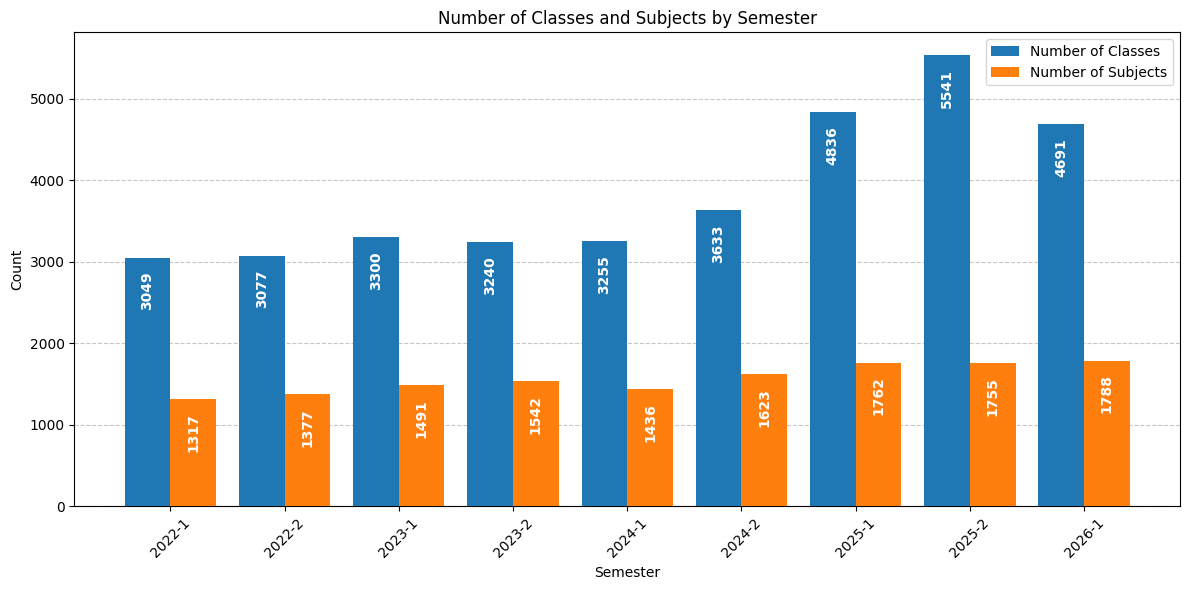

In [ ]:
# 1. Prepare Data: Group by Semester and count unique values
# Note: We use .sort_index() to ensure semeters appear chronologically (2022_1 -> 2026_1)
classes_per_semester = programacion.groupby("Semestre")["Número de Clase"].nunique().sort_index()
subjects_per_semester = programacion.groupby("Semestre")["Código Materia"].nunique().sort_index()

# Define the labels (semesters) based on the sorted index
semesters = classes_per_semester.index
x = np.arange(len(semesters))   # Base positions for the x-axis
width = 0.4                     # Bar width

# 2. Setup the Plot (Using fig, ax is better for customization)
fig, ax = plt.subplots(figsize=(12, 6))

# Generate Bars
# Note: 'zorder=3' ensures bars are drawn on top of the grid
rects1 = ax.bar(x - width/2, classes_per_semester.values, width, label='Number of Classes', zorder=3)
rects2 = ax.bar(x + width/2, subjects_per_semester.values, width, label='Number of Subjects', zorder=3)

# 3. Add Vertical Labels inside the bars
def add_vertical_labels(rects):
    """
    Function to attach a text label inside the top of each bar
    displaying its height.
    """
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -10),    # Offset: 10 points down from the top
                    textcoords="offset points",
                    ha='center', va='top', # Center horizontally, align top vertically
                    rotation=90,           # Rotate text vertically
                    color='white',         # White text for contrast
                    fontweight='bold')

add_vertical_labels(rects1)
add_vertical_labels(rects2)

# 4. Chart Formatting
ax.set_title('Number of Classes and Subjects by Semester')
ax.set_xlabel('Semester')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(semesters, rotation=45) # 45 degrees is often easier to read than 90
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

plt.tight_layout()
plt.show()

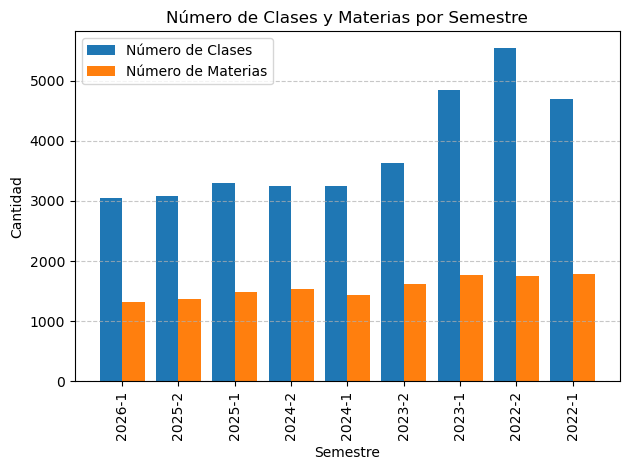

In [ ]:
clases_por_semestre = programacion.groupby("Semestre")["Número de Clase"].nunique()
materias_por_semestre = programacion.groupby("Semestre")["Código Materia"].nunique()
#semestres = clases_por_semestre.index
x = np.arange(len(semestres))   # posiciones base
width = 0.4    

# Barras
barras_clases = plt.bar(
    x - width/2,
    clases_por_semestre.values,
    width,
    label='Número de Clases'
)

barras_materias = plt.bar(
    x + width/2,
    materias_por_semestre.values,
    width,
    label='Número de Materias'
)

# Etiquetas
plt.title('Número de Clases y Materias por Semestre')
plt.xlabel('Semestre')
plt.ylabel('Cantidad')
plt.xticks(x, semestres, rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
print(classes_per_semester)
print(subjects_per_semester)

Semestre
2022-1    3049
2022-2    3077
2023-1    3300
2023-2    3240
2024-1    3255
2024-2    3633
2025-1    4836
2025-2    5541
2026-1    4691
Name: Número de Clase, dtype: int64
Semestre
2022-1    1317
2022-2    1377
2023-1    1491
2023-2    1542
2024-1    1436
2024-2    1623
2025-1    1762
2025-2    1755
2026-1    1788
Name: Código Materia, dtype: int64


hacer el replace de los codigos de los semestres 2166 por 2022-1 --> Hecho
replace de los nombres de las columnas --> Hecho

cantidad de estudiantes por semestre

cantidad de estudiantes por escuela x semestre

cantidad de materias y clases por escuela (grafico de parche)

estudiantes a lo largo del tiemo en x materia

In [ ]:
prog_acad_semestre_escuela = programacion.groupby(["Semestre", "Escuela"])["Número de Clase"].nunique().unstack(fill_value=0)
prog_acad_semestre_escuela

Escuela,Direc Dsllo Humano y Bienestar,E Ciencias Aplic e Ingeniería,"E.Finanzas, Economía, Gobierno",Escuela de Administración,Escuela de Artes y Humanidades,Escuela de Ciencias,Escuela de Derecho,Vicerrectoría Soste y Proy Soc,Vicerrectoría de Aprendizaje
Semestre,,,,,,,,,
2022-1,0,611,185,476,884,388,209,221,75
2022-2,0,1044,167,545,782,53,180,125,181
2023-1,0,1062,170,594,788,58,213,174,241
2023-2,0,1025,210,582,806,41,180,135,261
2024-1,0,1211,232,651,699,1,197,179,85
2024-2,0,1260,241,750,768,0,302,144,168
2025-1,83,1265,267,753,989,0,271,101,1107
2025-2,67,1210,269,744,1783,0,262,78,1128
2026-1,86,1305,313,758,1308,0,254,105,562


C:\Users\hzapata1\AppData\Local\Temp\ipykernel_17064\1235906372.py:32: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, valores_ing, 'o-', linewidth=2, linestyle='solid', label='Esc ing', color='blue')
C:\Users\hzapata1\AppData\Local\Temp\ipykernel_17064\1235906372.py:35: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, valores_feg, 'o-', linewidth=2, linestyle='solid', label='Esc FEG', color='green')
C:\Users\hzapata1\AppData\Local\Temp\ipykernel_17064\1235906372.py:38: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, valores_admon, 'o-', linewidth=2, linestyle='solid', label='E

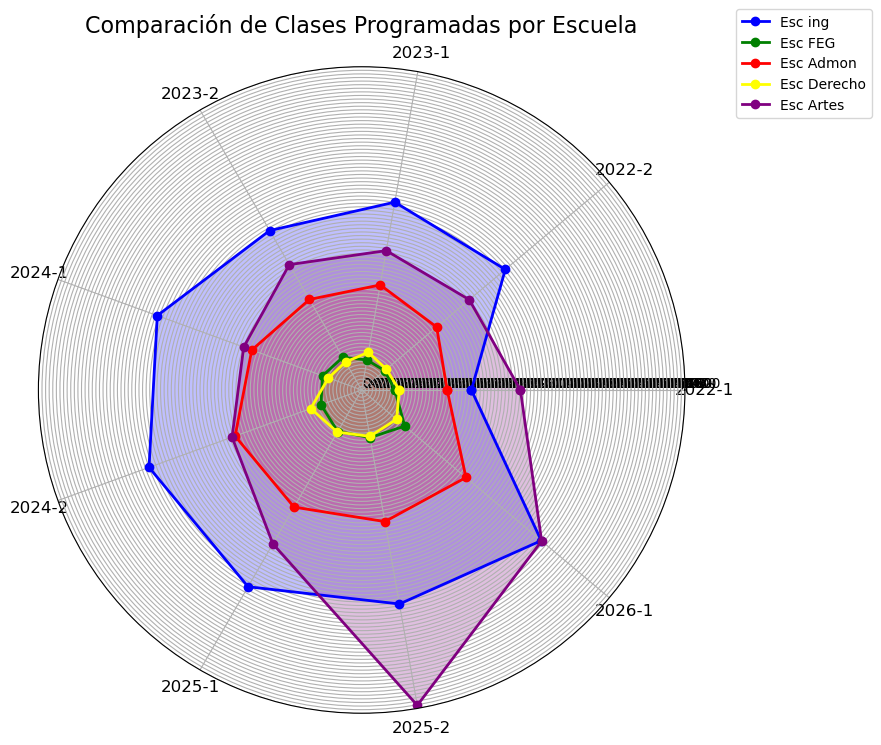

In [ ]:
# preparar los datos para el gráfico de araña
#los semestres serán nuestros ejes radiales (variables)
idx_semestres = prog_acad_semestre_escuela.index.tolist()
num_semestres = len(idx_semestres)

#calcular el ángulo paa cada eje radial
# Sumamos el primer ángulo al final para cerrar el polígono en el gráfico
angles = np.linspace(0, 2 * np.pi, num_semestres, endpoint=False).tolist()
angles += angles[:1] # Esto es clave para que el polígono se cierre

# Extraer los datos para cada equipo.
valores_ing = prog_acad_semestre_escuela['E Ciencias Aplic e Ingeniería'].tolist()
valores_ing += valores_ing[:1]

valores_artes = prog_acad_semestre_escuela['Escuela de Artes y Humanidades'].tolist()
valores_artes += valores_artes[:1]

valores_feg = prog_acad_semestre_escuela['E.Finanzas, Economía, Gobierno'].tolist()
valores_feg += valores_feg[:1]

valores_admon = prog_acad_semestre_escuela['Escuela de Administración'].tolist()
valores_admon += valores_admon[:1]

valores_derecho = prog_acad_semestre_escuela['Escuela de Derecho'].tolist()
valores_derecho += valores_derecho[:1]

#  Crear el Gráfico de Araña
plt.figure(figsize=(9, 9)) # Ajusta el tamaño de la figura para un buen círculo
ax = plt.subplot(111, polar=True) # Creamos un subplot con proyección polar

# Dibujar cada polígono para cada equipo
ax.plot(angles, valores_ing, 'o-', linewidth=2, linestyle='solid', label='Esc ing', color='blue')
ax.fill(angles, valores_ing, color='blue', alpha=0.25) # Rellena el área para mejor visualización

ax.plot(angles, valores_feg, 'o-', linewidth=2, linestyle='solid', label='Esc FEG', color='green')
ax.fill(angles, valores_feg, color='green', alpha=0.25)

ax.plot(angles, valores_admon, 'o-', linewidth=2, linestyle='solid', label='Esc Admon', color='red')
ax.fill(angles, valores_admon, color='red', alpha=0.25)

ax.plot(angles, valores_derecho, 'o-', linewidth=2, linestyle='solid', label='Esc Derecho', color='yellow')
ax.fill(angles, valores_derecho, color='yellow', alpha=0.25)

ax.plot(angles, valores_artes, 'o-', linewidth=2, linestyle='solid', label='Esc Artes', color='purple')
ax.fill(angles, valores_artes, color='purple', alpha=0.25)

# 4. Personalizar el Gráfico
# Establecer los ticks para los ejes radiales (la escala)
ax.set_rticks(np.arange(0, 2000, 20)) # Ticks en 0, 2, 4, 6, 8, 10
ax.set_rlabel_position(0) # Posición de las etiquetas de la escala
ax.set_rlim(0, 1800) # Rango de la escala de 0 a 10

# Establecer las etiquetas de las habilidades en los ejes
ax.set_xticks(angles[:-1]) # Establecer la posición de las etiquetas
ax.set_xticklabels(idx_semestres, fontsize=12) # Asignar los nombres de las habilidades

# Añadir título y leyenda
plt.title('Comparación de Clases Programadas por Escuela', va='bottom', fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1)) # Posicionar la leyenda fuera del gráfico

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Perfom automated EDA and Compare results between manual and automated EDA

---

## 6. Descriptive Statistical Analysis

Quantitative summary of the dataset characteristics.

* Measures of Central Tendency (mean, median, mode).
* Measures of Dispersion (standard deviation, variance).
* Correlations between variables.

---

## 7. Findings and Business Insights

Argumentation of the results obtained in the previous phases.

* **Finding 1:** [Description] -> **Impact:** [Business Value].
* **Finding 2:** [Description] -> **Impact:** [Business Value].
* **General Conclusion:** How does this help solve the problem stated in Section 1?

---

## 8. (Optional) Predictive Modeling

Application of Machine Learning algorithms.

### 8.1. Model Training
* Data Splitting (Train/Test).
* Algorithm Selection.

### 8.2. Evaluation and Predictions
* Performance Metrics (Accuracy, RMSE, etc.).

### 8.3. Model Interpretation
* Argumentation on how the predictive model provides tangible added value to the business.

### 8.4. How do the results differ when the model is run with dirty data?
* Run again with dirty data and compare

---

## OTHER:

In [85]:
#clases_inscripcion = programacion[programacion["Tipo Clase"]=="Sección Inscripción"]#.groupby(["Semestre", "Número de Clase"])["Total Inscritos"].sum()
#clases_inscripcion

In [86]:
#estudiates_por_semestre = programacion.groupby("Semestre")["Total Inscritos"].sum()
#estudiates_por_semestre